In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

In [3]:
"AI2-THOR Version: " + ai2thor.__version__

'AI2-THOR Version: 5.0.0'

In [4]:
import cv2
print(cv2.__version__)

4.8.0


## Workspace

In [5]:
def show_object_detected(controller, object_names):

    data = controller.last_event.metadata['objects']

    df_data = pd.DataFrame(data)

    df_object = df_data[df_data['name'].isin(object_names)]
    
    print('Object detected:')
    print(dict(df_object['name'][df_object['visible'] == True]))
    
    return df_object

In [6]:
floor_index = random.randint(0, 30)
floor_index = "20"

controller = Controller(
    agentMode = "default", # default, locobot, arm
    visibilityDistance = 0.50,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.1,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalitiesB
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [7]:
objects = controller.last_event.metadata['objects']
object_names = [obj['name'] for obj in objects]

In [8]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

q = "LookUp"
e = "LookDown"

z = "Stand"
c = "Crouch"

In [9]:
data = controller.last_event.metadata['objects']
df_data = pd.DataFrame(data)

In [10]:
def reallocate_agent(controller):
    
    positions = [{'x': 0.5, 'y': 0.9009991884231567, 'z': -1.25}]
    
    position = random.choice(positions)
    
    controller.step(
        action="Teleport",
        position=position,
        rotation=dict(x=0, y=90, z=0),
        horizon=0,
        standing=True
    )

In [11]:
def reposition_agent(controller):
    
    
    event = controller.step("RotateLeft")
    event = controller.step("MoveAhead")
    
    event = controller.step(
        action="PickupObject",
        objectId="Bowl|+01.59|+00.90|-01.26",
        forceAction=False,
        manualInteract=False
    )

In [10]:
reposition_agent(controller)

NameError: name 'reposition_agent' is not defined

In [11]:
df_object = show_object_detected(controller, object_names)
df_object[]

Object detected:
{5: 'Cabinet_82b18109', 18: 'CounterTop_e54defa0'}


,name,position,rotation,visible,isInteractable,receptacle,toggleable,isToggled,breakable,isBroken,...,receptacleObjectIds,distance,objectType,objectId,assetId,parentReceptacles,controlledObjects,isMoving,axisAlignedBoundingBox,objectOrientedBoundingBox
0,Apple_f4a7b8b3,"{'x': 0.24464967846870422, 'y': 0.982677161693...","{'x': 47.1675910949707, 'y': 53.04190444946289...",False,False,False,False,False,False,False,...,None,1.343855,Apple,Apple|+00.24|+00.98|+00.11,Apple_20,[DiningTable|+00.17|+00.01|+00.68],None,False,"{'cornerPoints': [[0.29593604803085327, 1.0351...","{'cornerPoints': [[0.22834497690200806, 0.8806..."
1,Bowl_89852f2b,"{'x': 1.5885838270187378, 'y': 0.8996596336364...","{'x': -8.26860559755005e-06, 'y': -0.000100745...",False,False,True,False,False,True,False,...,[],0.643345,Bowl,Bowl|+01.59|+00.90|-01.26,Bowl_20,[CounterTop|+00.23|+00.95|-02.00],None,False,"{'cornerPoints': [[1.6927342414855957, 0.98388...","{'cornerPoints': [[1.6927345991134644, 0.90000..."
2,Bread_460cf5d5,"{'x': 0.400924950838089, 'y': 0.96138650178909...","{'x': 0.0007587383734062314, 'y': 0.0081763863...",False,False,False,False,False,False,False,...,None,1.263657,Bread,Bread|+00.40|+00.96|+00.11,Bread_20,[DiningTable|+00.17|+00.01|+00.68],None,False,"{'cornerPoints': [[0.5073422193527222, 1.00375...","{'cornerPoints': [[0.507358729839325, 0.917730..."
3,ButterKnife_fb3d8c16,"{'x': -0.7910000085830688, 'y': 0.901332497596...","{'x': 0.00010245283920085058, 'y': 254.9994049...",False,False,False,False,False,False,False,...,None,2.148087,ButterKnife,ButterKnife|-00.79|+00.90|-02.19,ButterKnife_1,[CounterTop|+00.23|+00.95|-02.00],None,False,"{'cornerPoints': [[-0.6618815064430237, 0.9066...","{'cornerPoints': [[-0.9266512989997864, 0.9066..."
4,Cabinet_6d94ed85,"{'x': -0.8399999737739563, 'y': 0.469999998807...","{'x': -1.4033420794510015e-14, 'y': 90.0, 'z':...",False,False,True,False,False,False,False,...,[],2.003393,Cabinet,Cabinet|-00.84|+00.47|-01.67,,None,None,False,"{'cornerPoints': [[-0.8299999237060547, 0.8450...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Vase_3f629a7f,"{'x': 1.7407644987106323, 'y': 0.8861127495765...","{'x': 359.9560546875, 'y': 359.9679260253906, ...",False,False,False,False,False,True,False,...,None,3.553177,Vase,Vase|+01.74|+00.89|+02.48,Vase_Flat_1,[Shelf|+01.60|+00.88|+02.48],None,True,"{'cornerPoints': [[1.8162479400634766, 0.95627...","{'cornerPoints': [[1.816197156906128, 0.886042..."
65,Vase_75690eef,"{'x': 1.4943079948425293, 'y': 0.5491788983345...","{'x': 357.4695739746094, 'y': 0.93314611911773...",False,False,False,False,False,True,False,...,None,3.536633,Vase,Vase|+01.50|+00.55|+02.48,Vase_Tall_4,[Shelf|+01.60|+00.55|+02.48],None,False,"{'cornerPoints': [[1.581101655960083, 0.843415...","{'cornerPoints': [[1.5832940340042114, 0.55373..."
66,Vase_2e5cb9f8,"{'x': 1.8102222681045532, 'y': 0.5554006099700...","{'x': 0.023731369525194168, 'y': 0.02326030470...",False,False,False,False,False,True,False,...,None,3.530682,Vase,Vase|+01.81|+00.56|+02.42,Vase_Open_2,[Shelf|+01.60|+00.55|+02.48],None,True,"{'cornerPoints': [[1.9048080444335938, 0.80034...","{'cornerPoints': [[1.9048242568969727, 0.55629..."
67,Window_dcc7eda3,"{'x': 2.114000082015991, 'y': 1.49500000476837...","{'x': 90.0, 'y': 270.00006103515625, 'z': 0.0}",False,False,False,False,False,True,False,...,None,2.427172,Window,Window|+02.11|+01.50|+01.07,,None,None,False,"{'cornerPoints': [[2.260451555252075, 2.317502...",None


Agent position:
{'x': -0.800000011920929, 'y': 0.9009991884231567, 'z': -0.5}
Agent rotation:
{'x': -0.0, 'y': 270.0, 'z': 0.0}
Object detected:
{2: 'Bread_460cf5d5', 13: 'Cabinet_e4545dd9', 27: 'Fridge_c8d99c87'}


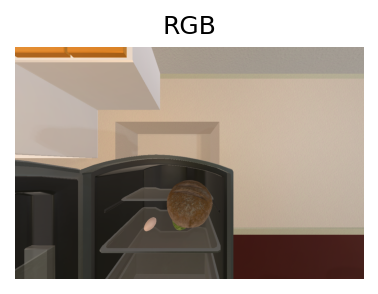

In [123]:
# initialize the environment and state
# controller.reset(random=True)
    
# reallocate_agent(controller)

command = w

event = controller.step(command)
agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)

agent_rotation = event.metadata["agent"]["rotation"]

print("Agent rotation:")
print(agent_rotation)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

In [15]:
# CounterTop_e54defa0 # DiningTable_00be542e

Agent position:
{'x': -0.800000011920929, 'y': 0.9009991884231567, 'z': -0.6000000238418579}
Object detected:
{13: 'Cabinet_e4545dd9', 27: 'Fridge_c8d99c87'}


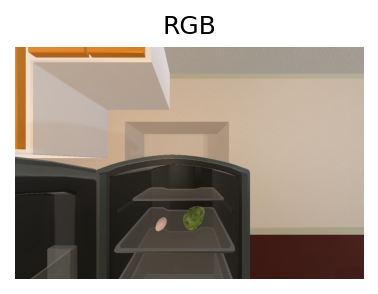

In [44]:
event = controller.step(
    action="OpenObject",
    objectId="Fridge|-01.50|+00.00|-00.70",
    forceAction=False
)

agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

Agent position:
{'x': -0.800000011920929, 'y': 0.9009991884231567, 'z': -0.5}
Object detected:
{13: 'Cabinet_e4545dd9', 27: 'Fridge_c8d99c87'}


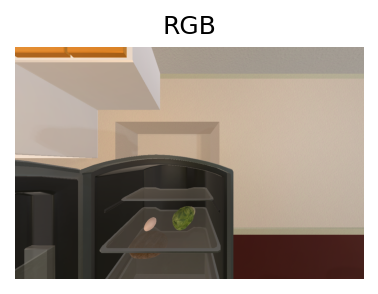

In [125]:
event = controller.step(
    action="PutObject",
    objectId="Fridge|-01.50|+00.00|-00.70",
    forceAction=True,
    placeStationary=True
)

agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

Agent position:
{'x': -1.0, 'y': 0.9009991884231567, 'z': -0.5}
Object detected:
{2: 'Bread_460cf5d5', 27: 'Fridge_c8d99c87', 31: 'Lettuce_e4d21ee2'}


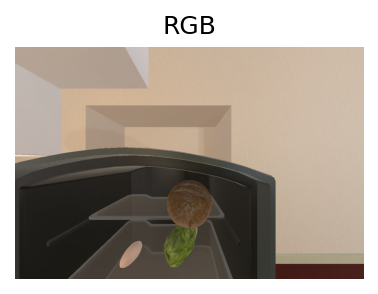

In [117]:
event = controller.step(
    action="PickupObject",
    objectId="Bread|+00.40|+00.96|+00.11", # Vase|+01.74|+00.89|+02.48 # Bowl|+01.59|+00.90|-01.26 # Bread|+00.40|+00.96|+00.11
    forceAction=False,
    manualInteract=False
)

agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

In [126]:
event.metadata["lastActionSuccess"]

True

Agent position:
{'x': 1.0, 'y': 0.9009991884231567, 'z': -1.0}
Object detected:
{18: 'CounterTop_e54defa0', 25: 'Floor_4679ca44', 56: 'StoveBurner_7b329248'}


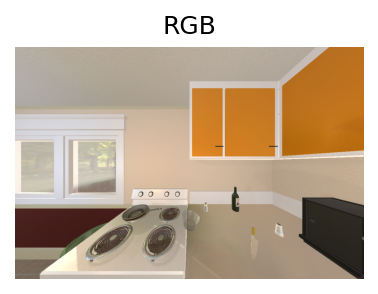

In [17]:
controller.step(
    action="ThrowObject",
    moveMagnitude=25.0,
    forceAction=False
)

agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

In [ ]:
event = controller.step(
    action="DropHandObject",
    forceAction=True
)

agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller, object_names)

plot_frames(controller.last_event)

In [ ]:
event.metadata["lastActionSuccess"]

---

In [129]:
def get_object_id_by_name(items, name):
    for item in items:
        if item['name'].startswith(name):
            return item['objectId']
    return None

# Example usage
object_id = get_object_id_by_name(metadata['objects'], "Apple_f4a7b8b3")

In [128]:
metadata = event.metadata
list(metadata.keys())

['objects',
 'isSceneAtRest',
 'agent',
 'heldObjectPose',
 'arm',
 'fov',
 'cameraPosition',
 'cameraOrthSize',
 'thirdPartyCameras',
 'collided',
 'collidedObjects',
 'inventoryObjects',
 'sceneName',
 'lastAction',
 'errorMessage',
 'errorCode',
 'lastActionSuccess',
 'screenWidth',
 'screenHeight',
 'agentId',
 'depthFormat',
 'colors',
 'flatSurfacesOnGrid',
 'distances',
 'normals',
 'isOpenableGrid',
 'segmentedObjectIds',
 'objectIdsInBox',
 'actionIntReturn',
 'actionFloatReturn',
 'actionStringsReturn',
 'actionFloatsReturn',
 'actionVector3sReturn',
 'visibleRange',
 'currentTime',
 'sceneBounds',
 'actionReturn']

In [130]:
metadata['objects']

[{'name': 'Apple_f4a7b8b3',
  'position': {'x': 0.2839409112930298,
   'y': 0.9727287888526917,
   'z': 0.10653366148471832},
  'rotation': {'x': 63.663482666015625,
   'y': 359.3023681640625,
   'z': 267.2904052734375},
  'visible': False,
  'isInteractable': False,
  'receptacle': False,
  'toggleable': False,
  'isToggled': False,
  'breakable': False,
  'isBroken': False,
  'canFillWithLiquid': False,
  'isFilledWithLiquid': False,
  'fillLiquid': None,
  'dirtyable': False,
  'isDirty': False,
  'canBeUsedUp': False,
  'isUsedUp': False,
  'cookable': False,
  'isCooked': False,
  'temperature': 'RoomTemp',
  'isHeatSource': False,
  'isColdSource': False,
  'sliceable': True,
  'isSliced': False,
  'openable': False,
  'isOpen': False,
  'openness': 0.0,
  'pickupable': True,
  'isPickedUp': False,
  'moveable': False,
  'mass': 0.20000000298023224,
  'salientMaterials': ['Food'],
  'receptacleObjectIds': None,
  'distance': 1.2441688776016235,
  'objectType': 'Apple',
  'objectI

In [ ]:
target_data = next((obj for obj in metadata['objects'] if obj['name'] == 'Bowl_89852f2b'), None)
target_data['isPickedUp']

In [ ]:
target_data = next((obj for obj in metadata['objects'] if obj['name'] == 'Bowl_89852f2b'), None)
target_data['objectId']

In [ ]:
target_data = next((obj for obj in metadata['objects'] if obj['name'] == 'Bowl_89852f2b'), None)
place_data = next((obj for obj in metadata['objects'] if obj['name'] == 'DiningTable_00be542e'), None)

if target_data['objectId'] in place_data['receptacleObjectIds']:
    print("Exist.")
else:
    print("Doesnot exist.")

In [ ]:
scene_name = event.metadata["sceneName"]
scene_bounds = event.metadata["sceneBounds"]
print(f"Scene name: {scene_name}, Scene bounds: X = {scene_bounds['size']['x']}, Y = {scene_bounds['size']['y']}")

In [ ]:
objects = controller.last_event.metadata['objects']
print(f"Total objects: {len(objects)}")

In [ ]:
names = [obj['name'] for obj in objects]
names # CoffeeMachine_ce92cf84, Fridge_5134d575, Vase_7932859a

In [ ]:
def encode_feedback(event, controller, target_name):
    
    agent_position = event.metadata["agent"]["position"]
    data = controller.last_event.metadata['objects']
    
    index_location = next((index for index, item in enumerate(data) if item['name'] == target_name), None)
    is_found = data[index_location]['visible']
    
    if is_found:
        reward = +10
    else:
        reward = -0.05
    
    return None, random.random(), is_found, None

---